In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/T-20.csv')

# Preprocessing of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comment_id         9814 non-null   int64  
 1   match_id           9814 non-null   int64  
 2   match_name         9814 non-null   object 
 3   home_team          9814 non-null   object 
 4   away_team          9814 non-null   object 
 5   current_innings    9814 non-null   object 
 6   innings_id         9814 non-null   int64  
 7   over               9814 non-null   int64  
 8   ball               9814 non-null   int64  
 9   runs               9814 non-null   int64  
 10  shortText          9814 non-null   object 
 11  isBoundary         9814 non-null   bool   
 12  isWide             9814 non-null   bool   
 13  isNoball           9814 non-null   bool   
 14  batsman1_id        9814 non-null   int64  
 15  batsman1_name      9814 non-null   object 
 16  batsman1_runs      9814 

In [4]:
df.head()

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText,Team
0,130,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,False,"short again, and he gets some extra bounce on ...",NaN,NaN,PAK
1,120,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,False,and he'll have to bowl another free-hit after ...,<p>Free-hit</p>,NaN,PAK
2,110,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,False,"full, and a hint of shape away from off stump....","<p><b>6.58pm</b> Thanks, Andrew M. The MCG is ...",NaN,PAK
3,140,1298179,ENG v PAK,PAK,ENG,PAK,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,False,"shortish, angling down leg, gloves a pull down...",NaN,NaN,PAK
4,150,1298179,ENG v PAK,PAK,ENG,PAK,1,1,3,0,...,NaN,NaN,NaN,NaN,NaN,False,"length ball close to off stump, straightens a ...",NaN,NaN,PAK


In [5]:
df.describe()

,comment_id,match_id,innings_id,over,ball,runs,batsman1_id,batsman1_runs,batsman1_balls,bowler1_id,...,batsman2_runs,batsman2_balls,bowler2_id,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_runs,wkt_batsman_balls
count,9814.000000,9.814000e+03,9814.000000,9814.000000,9814.000000,9814.000000,9.814000e+03,9814.000000,9814.000000,9.814000e+03,...,9814.000000,9814.000000,9.288000e+03,9288.000000,9288.000000,9288.000000,9288.000000,5.510000e+02,551.000000,551.000000
mean,85399.661708,1.298157e+06,1.477787,10.082841,3.486856,1.202262,5.377303e+05,15.691971,13.249440,6.226676e+05,...,14.978296,12.738537,6.216881e+05,2.172265,0.031654,14.684755,0.641042,5.691470e+05,15.029038,13.800363
std,78951.670137,1.355630e+01,0.499532,5.623045,1.707484,1.476730,3.181419e+05,16.454378,11.471307,3.276842e+05,...,16.376065,11.596212,3.287888e+05,1.039511,0.182317,9.366489,0.833070,3.305531e+05,16.466801,11.707343
min,110.000000,1.298135e+06,1.000000,1.000000,1.000000,0.000000,5.334000e+03,0.000000,0.000000,8.917000e+03,...,0.000000,0.000000,8.917000e+03,0.100000,0.000000,0.000000,0.000000,5.334000e+03,0.000000,1.000000
25%,18030.000000,1.298145e+06,1.000000,5.000000,2.000000,0.000000,3.089670e+05,4.000000,4.000000,3.481090e+05,...,2.000000,4.000000,3.481090e+05,1.000000,0.000000,7.000000,0.000000,3.233890e+05,3.000000,5.000000
50%,29010.000000,1.298157e+06,1.000000,10.000000,3.000000,1.000000,4.465070e+05,10.000000,10.000000,5.420230e+05,...,9.000000,9.000000,5.420230e+05,2.000000,0.000000,13.000000,0.000000,4.824780e+05,9.000000,10.000000
75%,118040.000000,1.298169e+06,2.000000,15.000000,5.000000,1.000000,7.843670e+05,23.000000,19.000000,9.229430e+05,...,23.000000,19.000000,9.229430e+05,3.000000,0.000000,20.000000,1.000000,8.337770e+05,21.000000,19.000000
max,219090.000000,1.298179e+06,2.000000,20.000000,6.000000,7.000000,1.278252e+06,109.000000,63.000000,1.278252e+06,...,107.000000,63.000000,1.278252e+06,4.000000,2.000000,59.000000,4.000000,1.278252e+06,109.000000,60.000000


In [7]:
print(df.isnull().sum())

comment_id              0
match_id                0
match_name              0
home_team               0
away_team               0
current_innings         0
innings_id              0
over                    0
ball                    0
runs                    0
shortText               0
isBoundary              0
isWide                  0
isNoball                0
batsman1_id             0
batsman1_name           0
batsman1_runs           0
batsman1_balls          0
bowler1_id              0
bowler1_name            0
bowler1_overs           0
bowler1_maidens         0
bowler1_runs            0
bowler1_wkts            0
batsman2_id             0
batsman2_name           0
batsman2_runs           0
batsman2_balls          0
bowler2_id            526
bowler2_name          526
bowler2_overs         526
bowler2_maidens       526
bowler2_runs          526
bowler2_wkts          526
wicket_id            9263
wkt_batsman_name     9263
wkt_bowler_name      9263
wkt_batsman_runs     9263
wkt_batsman_

# Analyzing the dataset

## Team Analsis

In [8]:
# total runs scored by the team in the tournament

team_runs = df.groupby('Team')['runs'].sum().sort_values(ascending = False)
print(team_runs)
print("\nTotal runs in the tournament = ",team_runs.sum())

Team
SL       1097
IRE      1045
NED      1011
ZIM      1010
INDIA    1004
PAK       979
NZ        854
ENG       848
BAN       665
SA        637
AUS       598
SCOT      467
NAM       424
AFG       419
WI        410
UAE       331
Name: runs, dtype: int64

Total runs in the tournament =  11799


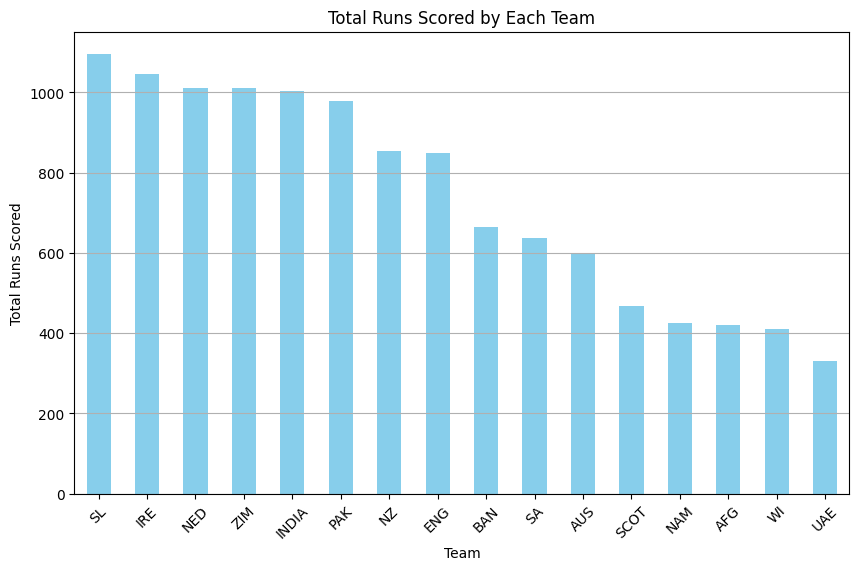

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
team_runs.plot(kind='bar', color='skyblue')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Runs Scored')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [10]:
# Highest runs scoerd by the team in 1 innings

Team_highest_runs = df.groupby(['Team','match_id'])['runs'].sum().sort_values(ascending=False)
print("\nTeam with highest runs in an tournament")
print(Team_highest_runs.head(10))


Team with highest runs in an tournament
Team   match_id
NZ     1298147     200
SA     1298156     200
PAK    1298170     185
INDIA  1298169     184
NZ     1298171     181
IRE    1298141     180
INDIA  1298176     180
       1298157     179
ENG    1298167     178
SCOT   1298141     176
Name: runs, dtype: int64


In [11]:
# most boundries scored by team

team_boundries = df.groupby('Team')['isBoundary'].sum().sort_values(ascending = False)
print(team_boundries)
print("\nTotal boundries in the tournament = ",team_boundries.sum())

Team
INDIA    117
IRE      112
SL       109
ZIM      109
NED      102
PAK       97
ENG       89
NZ        85
SA        78
AUS       70
BAN       68
SCOT      51
AFG       42
WI        42
NAM       34
UAE       27
Name: isBoundary, dtype: int64

Total boundries in the tournament =  1232


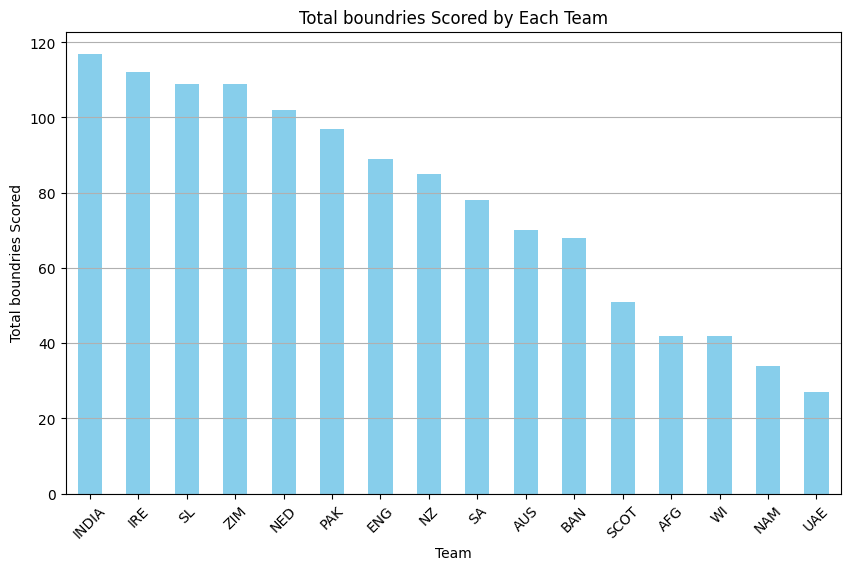

In [12]:
plt.figure(figsize=(10, 6))
team_boundries.plot(kind='bar', color='skyblue')
plt.title('Total boundries Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total boundries Scored')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [13]:
# most extras given by a team

team_extras = df.groupby('Team')['isWide'].sum() + df.groupby('Team')['isNoball'].sum()
team_extras.sort_values(ascending=False)

Team
ZIM      39
ENG      30
PAK      30
NED      28
SL       27
NZ       24
INDIA    23
IRE      22
AUS      21
WI       19
BAN      17
SA       17
SCOT     16
NAM      15
AFG      13
UAE      13
dtype: int64

## Batting Analysis

In [14]:
# highest runs during tournamet

batsman_runs = df.groupby('batsman1_name')['runs'].sum().sort_values(ascending=False)
print("\nTop 10 leading runscores of the tournament")
print(batsman_runs.head(10))


Top 10 leading runscores of the tournament
batsman1_name
Virat Kohli         310
Max O'Dowd          265
Jos Buttler         241
Suryakumar Yadav    236
Pathum Nissanka     232
Sikandar Raza       230
Kusal Mendis        229
Alex Hales          218
Lorcan Tucker       217
Glenn Phillips      209
Name: runs, dtype: int64


In [15]:
batsman_balls = df.groupby('batsman1_name')['batsman1_balls'].count().sort_values(ascending=False)
print("\nTop 10 batsmans who has faced most number of balls during Tournament")
print(batsman_balls.head(10))


Top 10 batsmans who has faced most number of balls during Tournament
batsman1_name
Max O'Dowd               223
Virat Kohli              222
Pathum Nissanka          201
Lorcan Tucker            170
Jos Buttler              164
Mohammad Rizwan          163
Najmul Hossain Shanto    161
Kusal Mendis             161
Shan Masood              156
Kane Williamson          155
Name: batsman1_balls, dtype: int64


In [16]:
# batsman with highest Strikerate
# Strike rate = runs/balls*100

strike_rate = (batsman_runs/batsman_balls*100).sort_values(ascending=False)
print("\nTop 10 batsmans with highest strikerate")
print(strike_rate.head(10))


Top 10 batsmans with highest strikerate
batsman1_name
Lungi Ngidi            400.000000
Mustafizur Rahman      220.000000
Arshdeep Singh         200.000000
JJ Smit                188.000000
Suryakumar Yadav       187.301587
Finn Allen             186.538462
Shaheen Shah Afridi    181.818182
Rashid Khan            178.125000
Shadab Khan            171.666667
Rilee Rossouw          171.084337
dtype: float64


In [17]:
batsman_boundries = df.groupby('batsman1_name')['isBoundary'].sum().sort_values(ascending = False)
print("\nTop 10 batsmans with highest boundries")
print(batsman_boundries.head(10))


Top 10 batsmans with highest boundries
batsman1_name
Suryakumar Yadav    34
Virat Kohli         33
Max O'Dowd          31
Jos Buttler         31
Alex Hales          29
Glenn Phillips      27
Sikandar Raza       27
Kusal Mendis        27
Lorcan Tucker       23
Paul Stirling       22
Name: isBoundary, dtype: int64


In [18]:
batsman_highest_runs = df.groupby(['batsman1_name','match_id'])['runs'].sum().sort_values(ascending=False)
print("\nTop 10 batsmans with highest runs in an innings")
print(batsman_highest_runs.head(10))


Top 10 batsmans with highest runs in an innings
batsman1_name    match_id
Rilee Rossouw    1298156     110
Glenn Phillips   1298161     109
Devon Conway     1298147      94
Michael Jones    1298141      90
Virat Kohli      1298150      88
Alex Hales       1298178      86
Max O'Dowd       1298143      84
Sikandar Raza    1298138      84
Jos Buttler      1298178      84
Pathum Nissanka  1298140      84
Name: runs, dtype: int64


In [19]:
highest_partnership = df.groupby(['batsman1_name','batsman2_name'])['runs'].sum().sort_values(ascending=False)
print("\nHighest patnership in an innings")
print(highest_partnership.head(10))


Highest patnership in an innings
batsman1_name     batsman2_name  
Alex Hales        Jos Buttler        200
Jos Buttler       Alex Hales         168
Mohammad Rizwan   Babar Azam         124
Suryakumar Yadav  Virat Kohli        111
Paul Stirling     Andy Balbirnie     109
Virat Kohli       Hardik Pandya      101
Babar Azam        Mohammad Rizwan    101
Rilee Rossouw     Quinton de Kock     97
Marcus Stoinis    Aaron Finch         97
Andy Balbirnie    Paul Stirling       95
Name: runs, dtype: int64


## Bowling analysis

In [20]:
bowler_wickets = df[df['wkt_text'] != 'not_a_wicket'].groupby('wkt_bowler_name').size()
print("Top 10 Bowlers with Highest wickets in Tournament")
print(bowler_wickets.sort_values(ascending=False).head(10))

Top 10 Bowlers with Highest wickets in Tournament
wkt_bowler_name
Wanindu Hasaranga de Silva    14
Bas de Leede                  13
Sam Curran                    13
Anrich Nortje                 13
Paul van Meekeren             13
Shadab Khan                   12
Blessing Muzarabani           12
Josh Little                   11
Maheesh Theekshana            11
Haris Rauf                    11
dtype: int64


In [21]:
total_wickets = bowler_wickets.sum()
print("total Wickets in the Tournament = ",total_wickets)

total Wickets in the Tournament =  551


In [22]:
bowler_highest_wickets = df.groupby(['wkt_bowler_name','match_id'])['wkt_bowler_name'].size().sort_values(ascending=False)
print("\nTop 10 bowlers with highest wickets in an innings")
print(bowler_highest_wickets.head(10))


Top 10 bowlers with highest wickets in an innings
wkt_bowler_name      match_id
Sam Curran           1298148     5
Anrich Nortje        1298156     5
Mark Wood            1298173     4
Chris Jordan         1298178     4
Shaheen Shah Afridi  1298175     4
Lungi Ngidi          1298164     4
Anrich Nortje        1298170     4
Mohammad Wasim       1298158     4
Taskin Ahmed         1298151     4
Naveen-ul-Haq        1298172     4
Name: wkt_bowler_name, dtype: int64


In [23]:
# highest runs given by bowler during tournamet

bowler_runs = df.groupby('bowler1_name')['runs'].sum().sort_values(ascending=False)
print("\nMost expensive bowlesr of the tournament")
print(bowler_runs.head(10))


Most expensive bowlesr of the tournament
bowler1_name
Barry McCarthy                230
Blessing Muzarabani           217
Maheesh Theekshana            205
Wanindu Hasaranga de Silva    205
Paul van Meekeren             204
Richard Ngarava               204
Mark Adair                    196
Josh Little                   195
Fred Klaassen                 195
Haris Rauf                    187
Name: runs, dtype: int64


In [24]:
# most economical bowlers
# Economy = runs/overs

bowler_runs = df.groupby('bowler1_name')['bowler1_runs'].sum().sort_values(ascending=True)
bowler_economy = bowler_runs / df.groupby('bowler1_name')['bowler1_overs'].sum().sort_values(ascending=True)
bowler_economy.sort_values(ascending=True).head(10)

bowler1_name
Nasum Ahmed          3.965844
Bhuvneshwar Kumar    4.534483
Brandon Glover       5.100118
Zahoor Khan          5.193906
Anrich Nortje        5.267905
Tim Pringle          5.277955
Cameron Green        5.363636
Gerhard Erasmus      5.390071
Jason Holder         5.392062
Mustafizur Rahman    5.472574
dtype: float64

In [25]:
# most boundries given by bowler during tournamet

bowler_boundries = df.groupby('bowler1_name')['isBoundary'].sum().sort_values(ascending = False)
print("\nTop 10 bowler with highest boundries given")
print(bowler_boundries.head(10))


Top 10 bowler with highest boundries given
bowler1_name
Blessing Muzarabani    26
Richard Ngarava        25
Barry McCarthy         25
Arshdeep Singh         23
Kagiso Rabada          22
Gareth Delany          22
Taskin Ahmed           21
Chris Woakes           21
Lockie Ferguson        20
Hasan Mahmud           20
Name: isBoundary, dtype: int64


In [26]:
# bowler with most extras

bowler_extras = df.groupby('bowler1_name')['isWide'].sum() + df.groupby('bowler1_name')['isNoball'].sum()
bowler_extras.sort_values(ascending=False).head(10)

bowler1_name
Mark Adair             17
Lahiru Kumara          12
Richard Ngarava        10
Fred Klaassen          10
Maheesh Theekshana      9
Chris Woakes            9
Barry McCarthy          9
Bas de Leede            9
Blessing Muzarabani     8
Mohammad Wasim          8
dtype: int64

In [27]:
bowler_noball = df.groupby('bowler1_name')['isNoball'].sum()
bowler_noball.sort_values(ascending=False).head(10)

bowler1_name
Taskin Ahmed           4
Blessing Muzarabani    4
Kasun Rajitha          3
Richard Ngarava        3
Mosaddek Hossain       2
Bas de Leede           2
Shoriful Islam         2
Lahiru Kumara          2
Odean Smith            2
Zahoor Khan            2
Name: isNoball, dtype: int64

In [28]:
bowler_wide = df.groupby('bowler1_name')['isWide'].sum()
bowler_wide.sort_values(ascending=False).head(10)

bowler1_name
Mark Adair            17
Lahiru Kumara         10
Fred Klaassen         10
Chris Woakes           9
Barry McCarthy         8
Josh Little            8
Mohammad Wasim         8
Maheesh Theekshana     8
Gareth Delany          8
Richard Ngarava        7
Name: isWide, dtype: int64

## Key events

In [33]:
df['match_id'] = df['match_id'].astype(str)
df['innings_id'] = df['innings_id'].astype(str)
key_events = df.groupby(['match_id', 'innings_id']).value_counts().fillna(0)
print("\nKey events in each match and innings:")
print(key_events.head(10))


Key events in each match and innings:
match_id  innings_id  comment_id  match_name   home_team  away_team  current_innings  over  ball  runs  shortText                                 isBoundary  isWide  isNoball  batsman1_id  batsman1_name        batsman1_runs  batsman1_balls  bowler1_id  bowler1_name         bowler1_overs  bowler1_maidens  bowler1_runs  bowler1_wkts  batsman2_id  batsman2_name    batsman2_runs  batsman2_balls  bowler2_id  bowler2_name       bowler2_overs  bowler2_maidens  bowler2_runs  bowler2_wkts  wicket_id  wkt_batsman_name     wkt_bowler_name      wkt_batsman_runs  wkt_batsman_balls  wkt_text                                                                        isRetiredHurt  text                                                                                                                                                                                                                                                                                              